In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df = data.copy()

In [4]:
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Dataset Info:
Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [5]:
print("First 5 rows:")
print(df.head())

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [7]:
print("Data Types and Missing Values:")
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
})
print(info_df)

Data Types and Missing Values:
            Data Type  Missing Values  Missing %
PassengerId     int64               0       0.00
Survived        int64               0       0.00
Pclass          int64               0       0.00
Name           object               0       0.00
Sex            object               0       0.00
Age           float64             177      19.87
SibSp           int64               0       0.00
Parch           int64               0       0.00
Ticket         object               0       0.00
Fare          float64               0       0.00
Cabin          object             687      77.10
Embarked       object               2       0.22


In [8]:
# Summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(df[numerical_cols].describe())
print()

Summary Statistics for Numerical Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



In [9]:
# Summary statistics for categorical features
print("Summary Statistics for Categorical Features:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'Name' and col != 'Ticket':  # Skip unique identifier-like columns
        print(f"\n{col}:")
        value_counts = df[col].value_counts()
        percentages = (df[col].value_counts(normalize=True) * 100).round(2)
        summary = pd.DataFrame({'Count': value_counts, 'Percentage': percentages})
        print(summary)

Summary Statistics for Categorical Features:

Sex:
        Count  Percentage
Sex                      
male      577       64.76
female    314       35.24

Cabin:
             Count  Percentage
Cabin                         
G6               4        1.96
C23 C25 C27      4        1.96
B96 B98          4        1.96
F2               3        1.47
D                3        1.47
...            ...         ...
E17              1        0.49
A24              1        0.49
C50              1        0.49
B42              1        0.49
C148             1        0.49

[147 rows x 2 columns]

Embarked:
          Count  Percentage
Embarked                   
S           644       72.44
C           168       18.90
Q            77        8.66


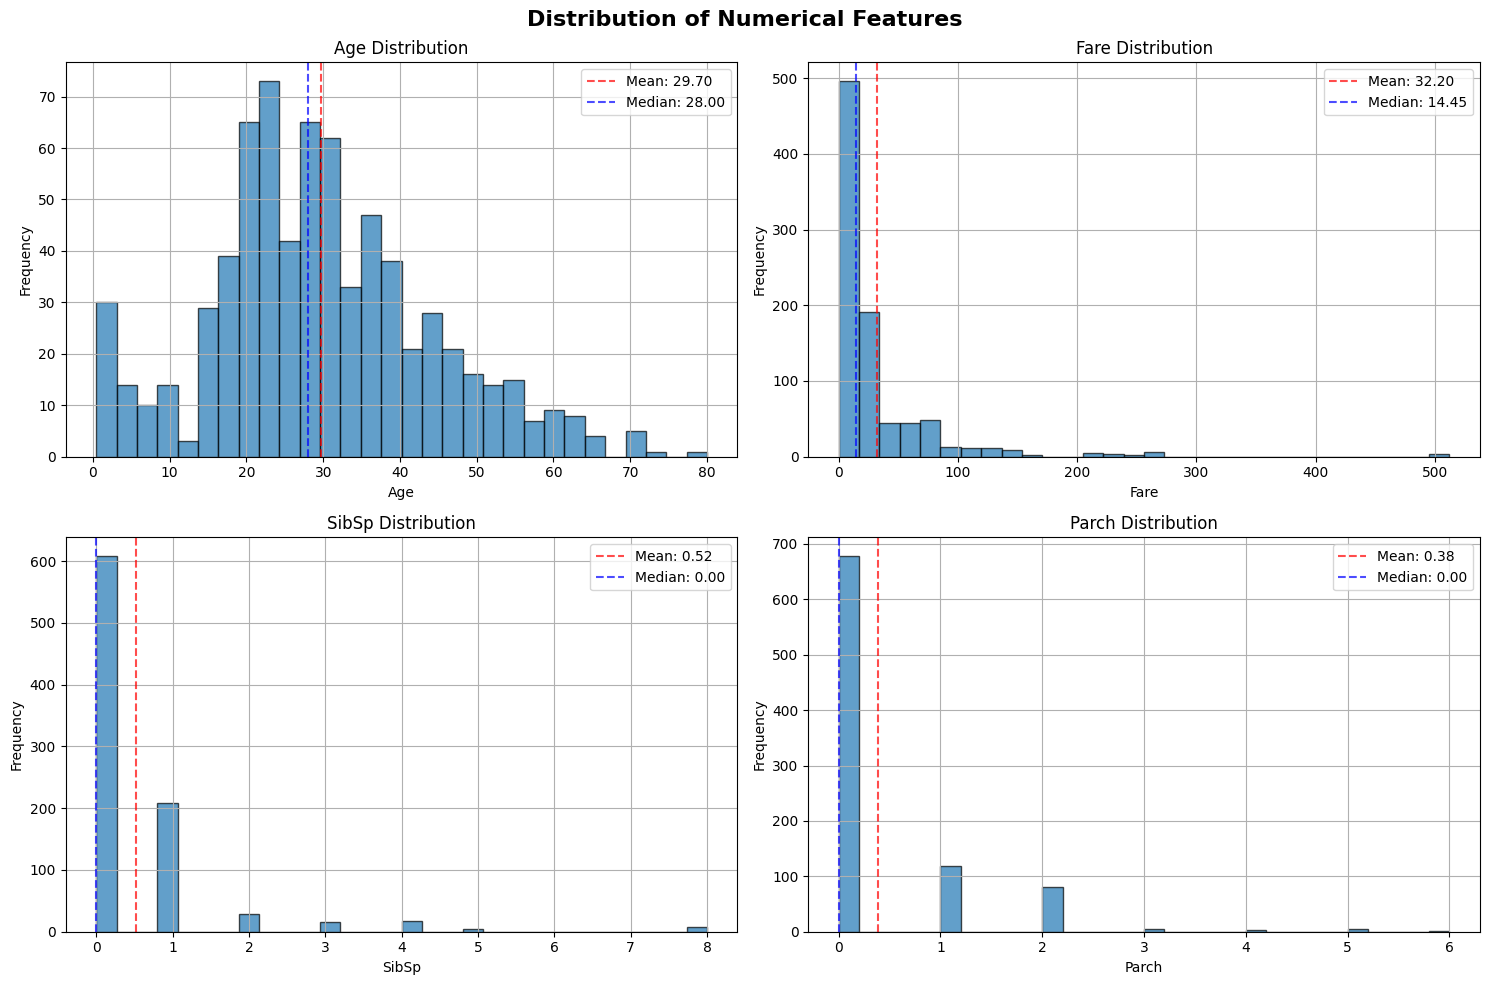

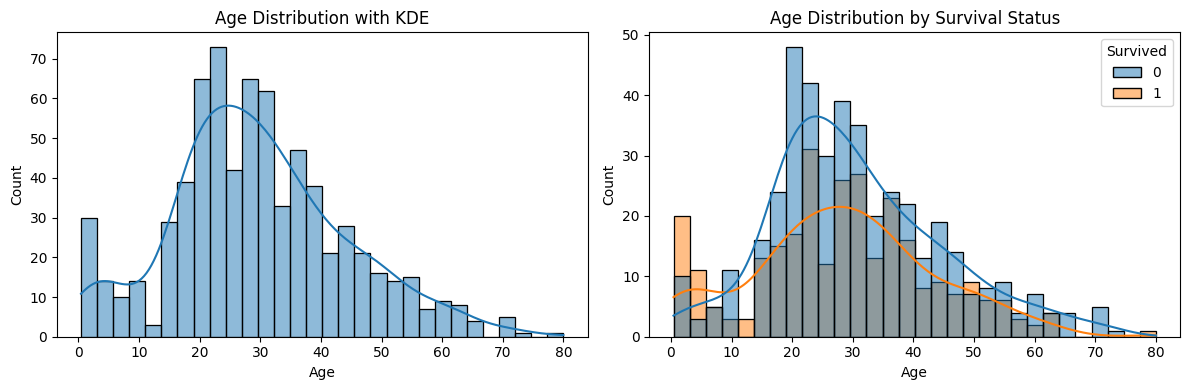

In [10]:
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
available_numerical = [col for col in numerical_features if col in df.columns]

if available_numerical:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

    for i, feature in enumerate(available_numerical[:4]):
        row, col = i // 2, i % 2

        # Histogram
        df[feature].hist(bins=30, ax=axes[row, col], alpha=0.7, edgecolor='black')
        axes[row, col].set_title(f'{feature} Distribution')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('Frequency')

        # Add statistics text
        mean_val = df[feature].mean()
        median_val = df[feature].median()
        std_val = df[feature].std()
        axes[row, col].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
        axes[row, col].axvline(median_val, color='blue', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
        axes[row, col].legend()

    plt.tight_layout()
    plt.show()

# Seaborn distribution plots
if 'Age' in df.columns:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='Age', kde=True, bins=30)
    plt.title('Age Distribution with KDE')

    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
    plt.title('Age Distribution by Survival Status')

    plt.tight_layout()
    plt.show()

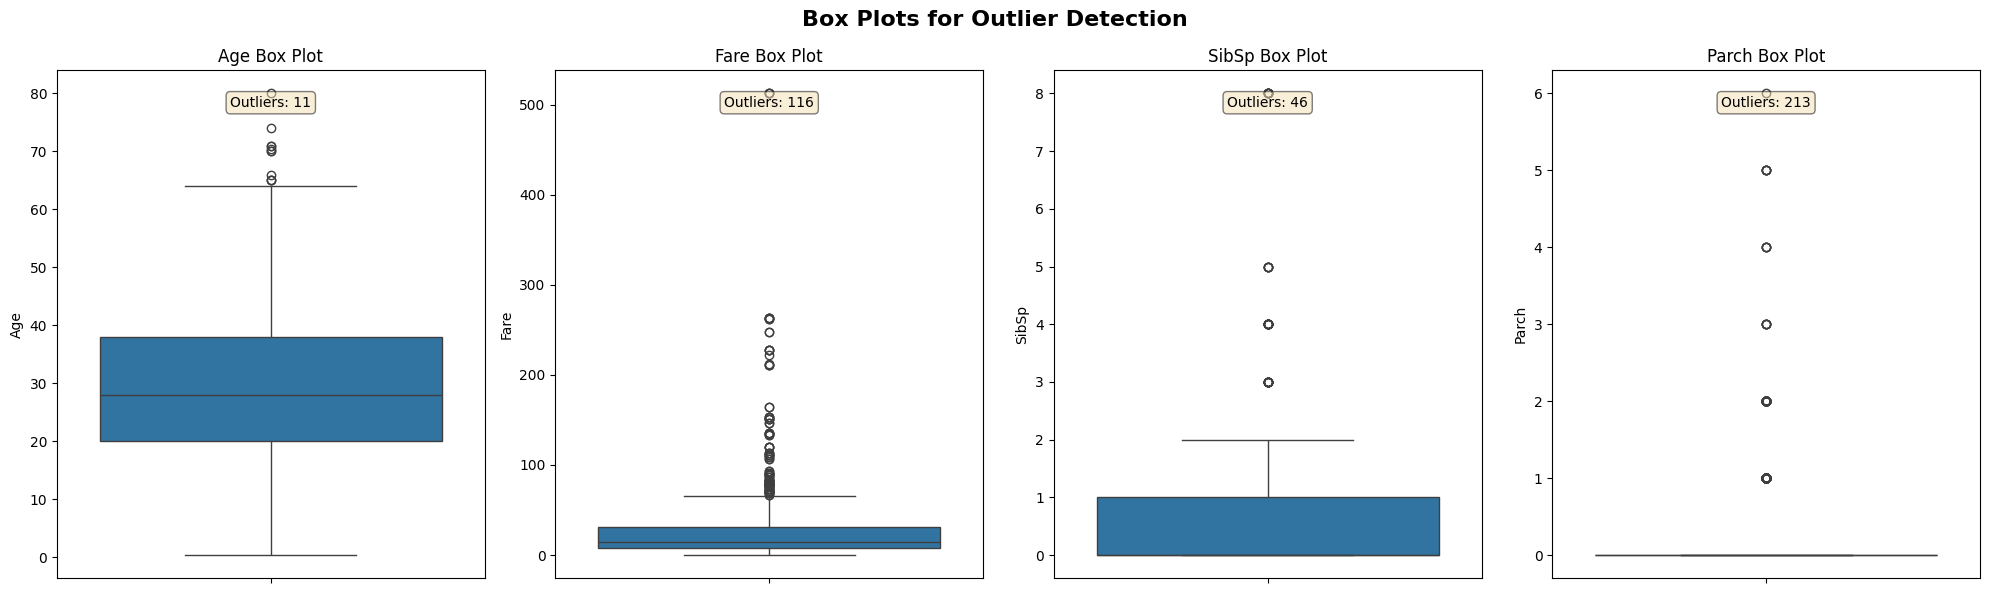

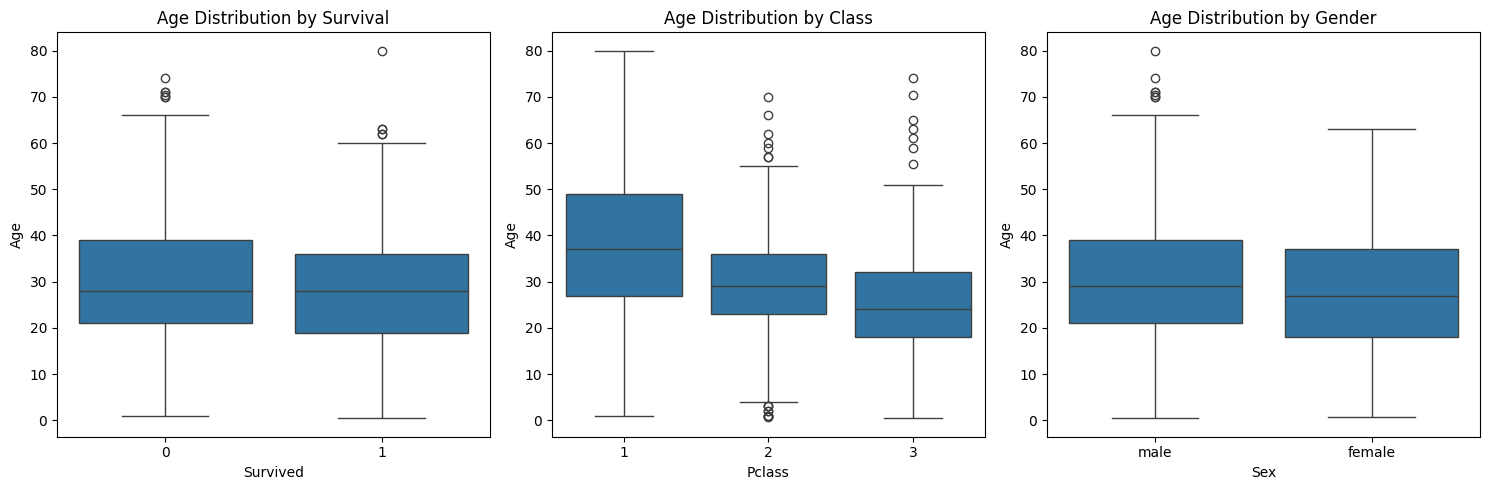

In [11]:
if available_numerical:
    fig, axes = plt.subplots(1, len(available_numerical), figsize=(5*len(available_numerical), 6))
    if len(available_numerical) == 1:
        axes = [axes]

    for i, feature in enumerate(available_numerical):
        sns.boxplot(data=df, y=feature, ax=axes[i])
        axes[i].set_title(f'{feature} Box Plot')

        # Calculate and display outliers
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)][feature]
        axes[i].text(0.5, 0.95, f'Outliers: {len(outliers)}',
                    transform=axes[i].transAxes, ha='center', va='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Box plots by categorical variables
if 'Survived' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    sns.boxplot(data=df, x='Survived', y='Age')
    plt.title('Age Distribution by Survival')

    if 'Pclass' in df.columns:
        plt.subplot(1, 3, 2)
        sns.boxplot(data=df, x='Pclass', y='Age')
        plt.title('Age Distribution by Class')

    if 'Sex' in df.columns:
        plt.subplot(1, 3, 3)
        sns.boxplot(data=df, x='Sex', y='Age')
        plt.title('Age Distribution by Gender')

    plt.tight_layout()
    plt.show()


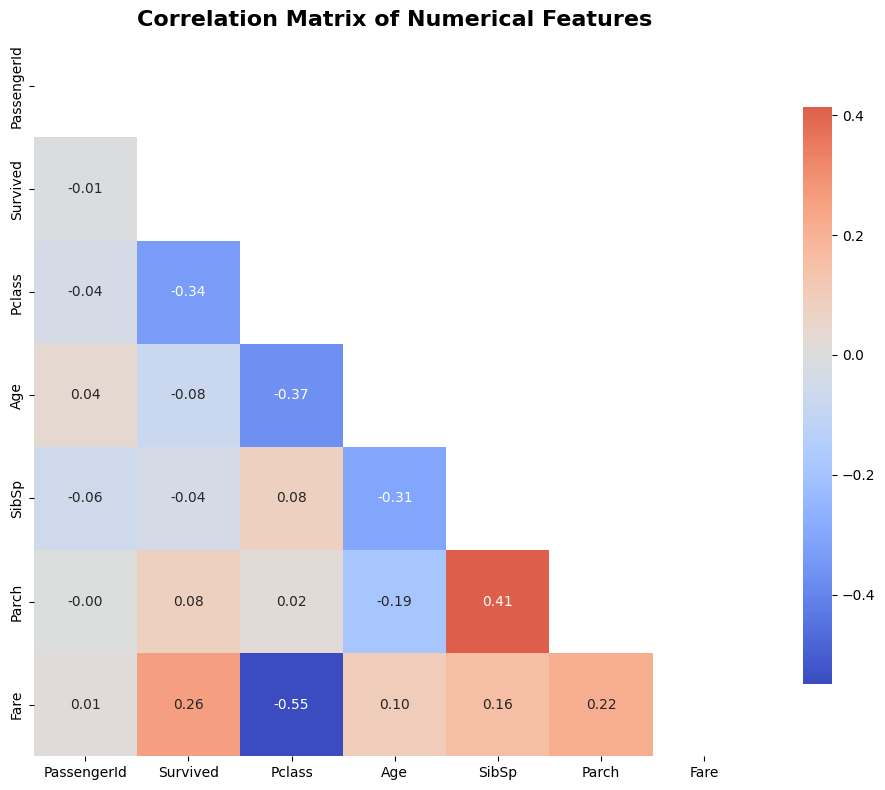

Strong Correlations (|r| > 0.5):
  Pclass - Fare: -0.549



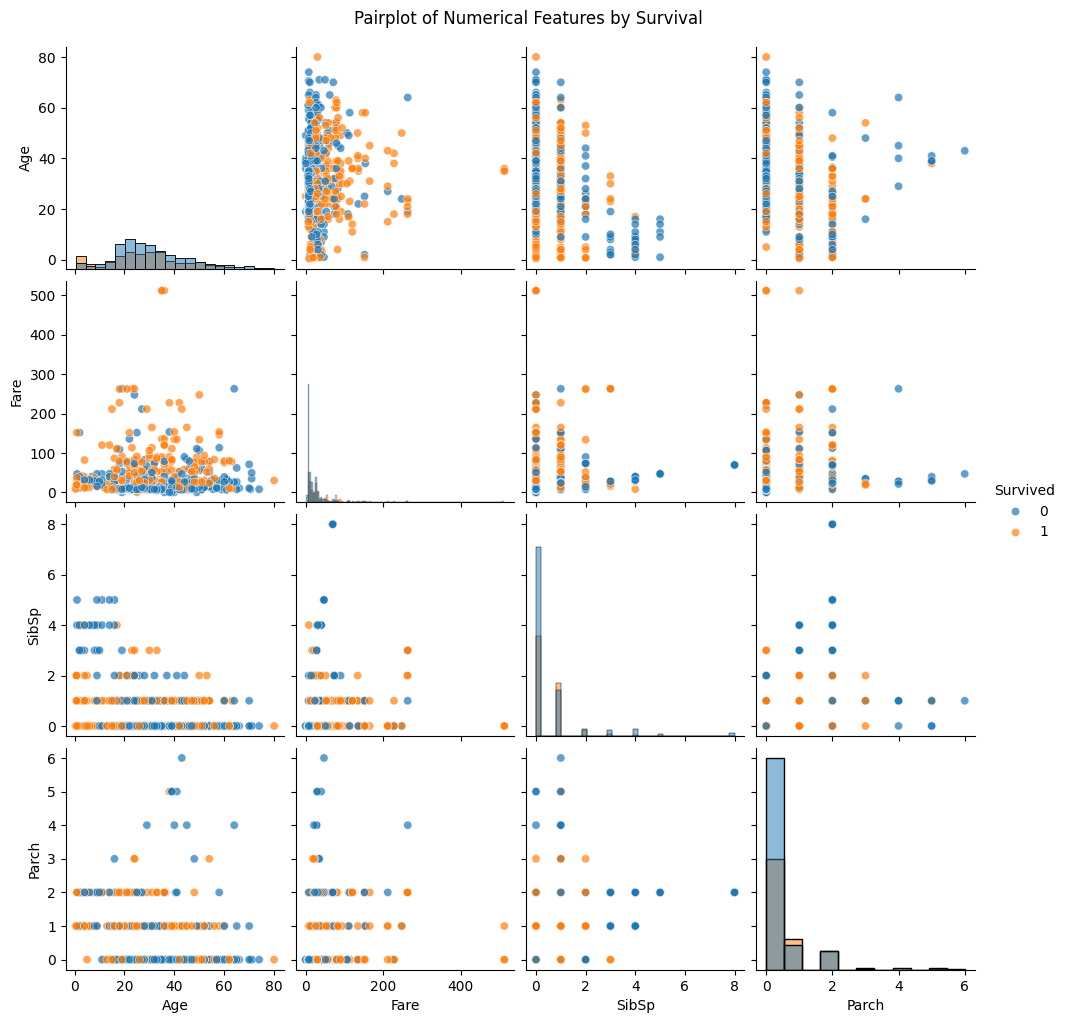

In [12]:
  # Correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()

    # Create heatmap
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                cmap='coolwarm',
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print strong correlations
    print("Strong Correlations (|r| > 0.5):")
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append((correlation_matrix.columns[i],
                                  correlation_matrix.columns[j],
                                  corr_val))

    if strong_corr:
        for feature1, feature2, corr in strong_corr:
            print(f"  {feature1} - {feature2}: {corr:.3f}")
    else:
        print("  No strong correlations found (|r| > 0.5)")
    print()

# Pairplot for numerical features
if len(available_numerical) > 1:
    # For large datasets, you might want to sample
    sample_size = min(len(df), 1000)  # Limit to 1000 rows for performance
    df_sample_plot = df.sample(n=sample_size, random_state=42) if len(df) > 1000 else df

    if 'Survived' in df.columns:
        g = sns.pairplot(df_sample_plot[available_numerical + ['Survived']],
                        hue='Survived',
                        plot_kws={'alpha': 0.7},
                        diag_kind='hist')
        g.fig.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
        plt.show()

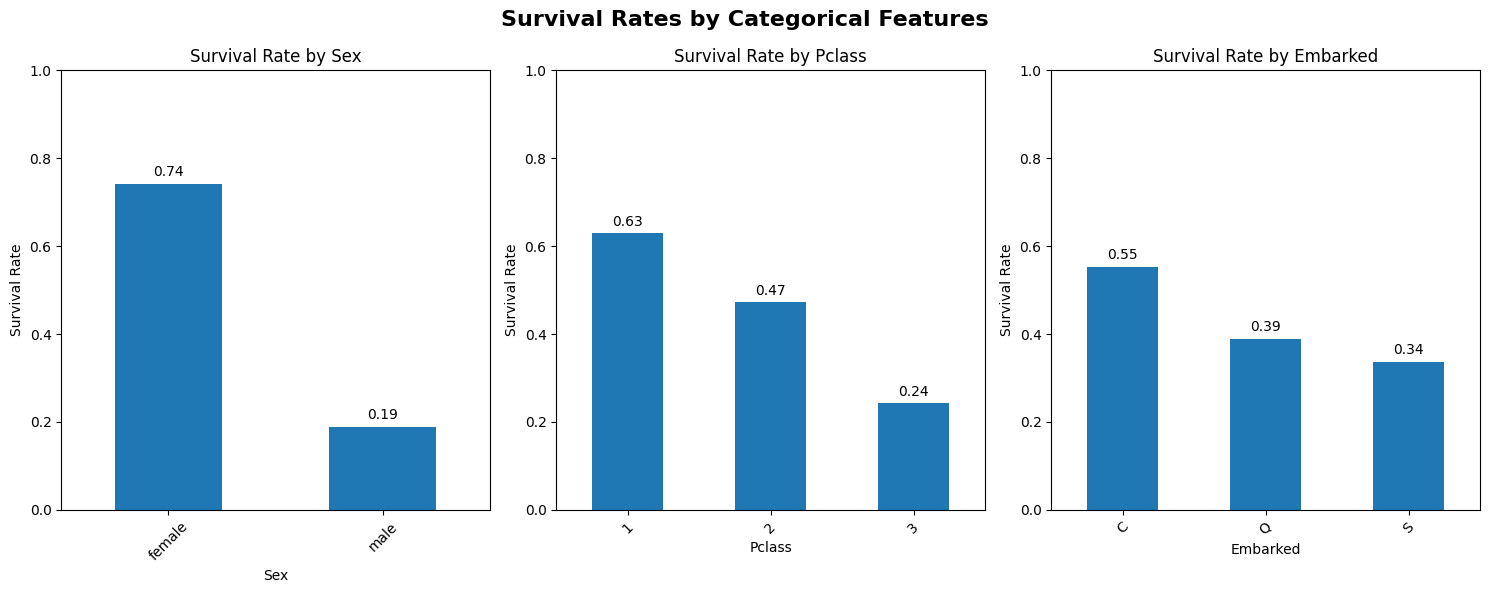

Cross-tabulation: Sex vs Survival
Counts:
Survived    0    1  All
Sex                    
female     81  233  314
male      468  109  577
All       549  342  891

Percentages:
Survived      0      1
Sex                   
female    25.80  74.20
male      81.11  18.89


In [13]:
# Survival analysis by categorical features
categorical_features = ['Sex', 'Pclass', 'Embarked']
available_categorical = [col for col in categorical_features if col in df.columns]

if 'Survived' in df.columns and available_categorical:
    fig, axes = plt.subplots(1, len(available_categorical), figsize=(5*len(available_categorical), 6))
    if len(available_categorical) == 1:
        axes = [axes]

    for i, feature in enumerate(available_categorical):
        survival_rate = df.groupby(feature)['Survived'].agg(['count', 'sum', 'mean'])

        # Bar plot
        survival_rate['mean'].plot(kind='bar', ax=axes[i], rot=45)
        axes[i].set_title(f'Survival Rate by {feature}')
        axes[i].set_ylabel('Survival Rate')
        axes[i].set_ylim(0, 1)

        # Add value labels on bars
        for j, v in enumerate(survival_rate['mean']):
            axes[i].text(j, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

    plt.suptitle('Survival Rates by Categorical Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Cross-tabulation analysis
if 'Survived' in df.columns and 'Sex' in df.columns:
    print("Cross-tabulation: Sex vs Survival")
    crosstab = pd.crosstab(df['Sex'], df['Survived'], margins=True)
    crosstab_pct = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
    print("Counts:")
    print(crosstab)
    print("\nPercentages:")
    print(crosstab_pct.round(2))

In [14]:
if 'Survived' in df.columns and 'Sex' in df.columns and 'Pclass' in df.columns:
    fig = px.sunburst(df, path=['Sex', 'Pclass', 'Survived'],
                      title='Survival Distribution by Gender and Class')
    fig.show()

# Interactive age distribution
if 'Age' in df.columns and 'Survived' in df.columns:
    fig = px.histogram(df, x='Age', color='Survived',
                       title='Age Distribution by Survival Status',
                       marginal='box')
    fig.show()

# Interactive scatter plot
if 'Age' in df.columns and 'Fare' in df.columns and 'Survived' in df.columns:
    fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                     size='SibSp' if 'SibSp' in df.columns else None,
                     hover_data=['Pclass'] if 'Pclass' in df.columns else None,
                     title='Age vs Fare by Survival Status')
    fig.show()

In [15]:
# Missing value analysis
print("Missing Value Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Percentage', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])
print()

# Outlier detection
print("Outlier Analysis:")
for col in available_numerical:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

    if len(outliers) > 0:
        print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")
        print(f"  Outlier range: < {lower_bound:.2f} or > {upper_bound:.2f}")
print()

# Survival insights
if 'Survived' in df.columns:
    print("Survival Insights:")
    overall_survival = df['Survived'].mean()
    print(f"Overall survival rate: {overall_survival:.2%}")

    # By gender
    if 'Sex' in df.columns:
        gender_survival = df.groupby('Sex')['Survived'].mean()
        print("Survival by gender:")
        for gender, rate in gender_survival.items():
            print(f"  {gender}: {rate:.2%}")

    # By class
    if 'Pclass' in df.columns:
        class_survival = df.groupby('Pclass')['Survived'].mean()
        print("Survival by class:")
        for pclass, rate in class_survival.items():
            print(f"  Class {pclass}: {rate:.2%}")

    # By age groups
    if 'Age' in df.columns:
        df['AgeGroup'] = pd.cut(df['Age'],
                               bins=[0, 12, 18, 35, 60, 100],
                               labels=['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior'],
                               include_lowest=True)
        age_survival = df.groupby('AgeGroup')['Survived'].mean()
        print("Survival by age group:")
        for age_group, rate in age_survival.items():
            print(f"  {age_group}: {rate:.2%}")

Missing Value Analysis:
          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467

Outlier Analysis:
Age: 11 outliers (1.2%)
  Range: 0.42 to 80.00
  Outlier range: < -6.69 or > 64.81
Fare: 116 outliers (13.0%)
  Range: 0.00 to 512.33
  Outlier range: < -26.72 or > 65.63
SibSp: 46 outliers (5.2%)
  Range: 0.00 to 8.00
  Outlier range: < -1.50 or > 2.50
Parch: 213 outliers (23.9%)
  Range: 0.00 to 6.00
  Outlier range: < 0.00 or > 0.00

Survival Insights:
Overall survival rate: 38.38%
Survival by gender:
  female: 74.20%
  male: 18.89%
Survival by class:
  Class 1: 62.96%
  Class 2: 47.28%
  Class 3: 24.24%
Survival by age group:
  Child: 57.97%
  Teen: 42.86%
  Adult: 38.27%
  Middle-aged: 40.00%
  Senior: 22.73%


In [16]:
insights = []

# Age insights
if 'Age' in df.columns:
    age_stats = df['Age'].describe()
    insights.append(f"Age: Mean age is {age_stats['mean']:.1f} years, with most passengers between {age_stats['25%']:.1f} and {age_stats['75%']:.1f} years.")

    if 'Survived' in df.columns:
        survivors_age = df[df['Survived'] == 1]['Age'].mean()
        non_survivors_age = df[df['Survived'] == 0]['Age'].mean()
        insights.append(f"Age vs Survival: Survivors averaged {survivors_age:.1f} years, non-survivors {non_survivors_age:.1f} years.")

# Fare insights
if 'Fare' in df.columns:
    fare_stats = df['Fare'].describe()
    insights.append(f"Fare: Highly skewed distribution (median: ${fare_stats['50%']:.2f}, mean: ${fare_stats['mean']:.2f}), indicating most passengers paid lower fares.")

# Family size insights
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves
    family_stats = df['FamilySize'].describe()
    insights.append(f"Family Size: Most passengers traveled alone or in small groups (mean: {family_stats['mean']:.1f}).")

# Class insights
if 'Pclass' in df.columns:
    class_dist = df['Pclass'].value_counts().sort_index()
    most_common_class = class_dist.idxmax()
    insights.append(f"Passenger Class: Class {most_common_class} was most common with {class_dist[most_common_class]} passengers.")

# Print all insights
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


1. Age: Mean age is 29.7 years, with most passengers between 20.1 and 38.0 years.
2. Age vs Survival: Survivors averaged 28.3 years, non-survivors 30.6 years.
3. Fare: Highly skewed distribution (median: $14.45, mean: $32.20), indicating most passengers paid lower fares.
4. Family Size: Most passengers traveled alone or in small groups (mean: 1.9).
5. Passenger Class: Class 3 was most common with 491 passengers.
